In [10]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
import numpy as np

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Daten\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')
df

,Unnamed: 0,date,SPD,Union,Grüne,FDP,AfD,Linke,FW,Andere,standardized_war_articles
0,0,2023-12-22,14.0,32.0,14.0,5.0,21.0,3.0,4,7,0.149730
1,1,2023-12-07,14.0,32.0,15.0,4.0,21.0,3.0,3,8,0.169740
2,2,2023-11-10,15.0,30.0,15.0,5.0,21.0,4.0,3,7,0.193503
3,3,2023-11-02,16.0,30.0,14.0,4.0,22.0,5.0,3,6,0.179060
4,4,2023-10-13,15.0,29.0,13.0,5.0,23.0,4.0,4,7,0.195236
...,...,...,...,...,...,...,...,...,...,...,...
685,685,2000-07-01,39.0,38.0,6.0,8.0,NaN,5.0,-,4,0.008333
686,686,2000-06-01,38.0,39.0,7.0,9.0,NaN,5.0,-,2,0.015557
687,687,2000-05-01,41.0,36.0,6.0,7.0,NaN,5.0,-,5,0.027951
688,688,2000-04-07,39.0,34.0,8.0,7.0,NaN,7.0,-,5,0.014863


In [43]:
corr_matrix = df.corr()
spd_true = corr_matrix["standardized_war_articles"]["SPD"]
union_true = corr_matrix["standardized_war_articles"]["Union"]
grüne_true = corr_matrix["standardized_war_articles"]["Grüne"]
fdp_true = corr_matrix["standardized_war_articles"]["FDP"]
afd_true = corr_matrix["standardized_war_articles"]["AfD"]
linke_true = corr_matrix["standardized_war_articles"]["Linke"]
corr_matrix

,Unnamed: 0,SPD,Union,Grüne,FDP,AfD,Linke,standardized_war_articles
Unnamed: 0,1.000000,0.790215,0.704783,-0.613996,0.106899,-0.744787,-0.209843,-0.054925
SPD,0.790215,1.000000,0.445705,-0.670112,-0.019615,-0.653440,-0.155073,-0.061805
Union,0.704783,0.445705,1.000000,-0.587615,-0.308989,-0.731224,-0.264622,-0.060592
Grüne,-0.613996,-0.670112,-0.587615,1.000000,-0.122157,0.357925,-0.028808,0.081678
FDP,0.106899,-0.019615,-0.308989,-0.122157,1.000000,0.436607,0.317068,-0.029795
AfD,-0.744787,-0.653440,-0.731224,0.357925,0.436607,1.000000,-0.329152,0.106104
Linke,-0.209843,-0.155073,-0.264622,-0.028808,0.317068,-0.329152,1.000000,0.003688
standardized_war_articles,-0.054925,-0.061805,-0.060592,0.081678,-0.029795,0.106104,0.003688,1.000000


In [38]:
B = 10000
# data frame with column for each party and 10000 rows with their correlation value
corr_values = pd.DataFrame(columns=["SPD", "Union", "Grüne", "FDP", "AfD", "Linke"])
# permute article number
for x in range(B):
    df_permutated = df
    index = len(corr_values)
    df_permutated["standardized_war_articles"] = np.random.permutation(df["standardized_war_articles"])
    corr_matrix_permuted = df_permutated.corr()
    corr_values.loc[index, "SPD"] = corr_matrix_permuted["standardized_war_articles"]["SPD"]
    corr_values.loc[index, "Union"] = corr_matrix_permuted["standardized_war_articles"]["Union"]
    corr_values.loc[index, "Grüne"] = corr_matrix_permuted["standardized_war_articles"]["Grüne"]
    corr_values.loc[index, "FDP"] = corr_matrix_permuted["standardized_war_articles"]["FDP"]
    corr_values.loc[index, "AfD"] = corr_matrix_permuted["standardized_war_articles"]["AfD"]
    corr_values.loc[index, "Linke"] = corr_matrix_permuted["standardized_war_articles"]["Linke"]

corr_values

,SPD,Union,Grüne,FDP,AfD,Linke
0,-0.021718,-0.006263,0.027158,-0.010259,0.037088,0.047045
1,-0.083076,-0.012653,0.007693,0.015586,0.035946,0.050106
2,-0.036168,-0.027749,0.03925,-0.048526,0.067832,-0.013722
3,0.010226,-0.021889,0.043783,-0.056475,0.030749,-0.018559
4,-0.032311,-0.012477,0.021686,-0.043329,0.034927,0.016665
...,...,...,...,...,...,...
9995,0.000128,0.050619,0.008397,-0.04754,-0.033497,0.01133
9996,-0.05258,-0.053615,0.05501,0.046854,0.122093,-0.064227
9997,0.011387,0.006296,0.045056,-0.019716,-0.012863,-0.030171
9998,0.026443,0.036931,-0.013186,-0.043533,-0.076518,-0.056344


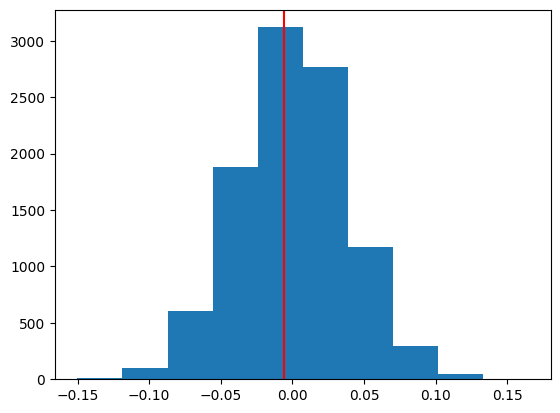

In [41]:
fig, axs = plt.subplots()
axs.hist(corr_values["Linke"])
axs.axvline(linke_true, alpha=1.0, color="red")